In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def plot_policy_cost_vs_nclass(df):
    # Filter dataframe for method 'unconditional_discrete_lindsey'
    df_filtered = df[df['method'] == 'unconditional_discrete_lindsey']

    # Get unique dimensions
    dimensions = np.sort(df_filtered['d'].unique())

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

    # Plot for each dimension
    for i, d in enumerate(dimensions):
        ax = axs[i // 2, i % 2]  # Calculate subplot index
        data = df_filtered[df_filtered['d'] == d]  # Filter data for dimension d
        ax.plot(data['nclass'], data['policy_cost'], marker='o', linestyle='-', label='unconditional_discrete_lindsey')
        
        # Add horizontal line for 'unconditional' method
        unconditional_cost = df[(df['method'] == 'unconditional') & (df["d"] == d)]['policy_cost'].iloc[0]
        ax.axhline(y=unconditional_cost, color='r', linestyle='--', label='unconditional')
        
        ax.set_xlabel('Number of Classes')
        ax.set_ylabel('Policy Cost')
        ax.set_title(f'd={d}')
        ax.grid(True)
        ax.legend()

    plt.suptitle('Policy Cost vs. Number of Classes')
    plt.tight_layout()
    plt.savefig("figs/malawi_nclass.pdf")
    plt.show()

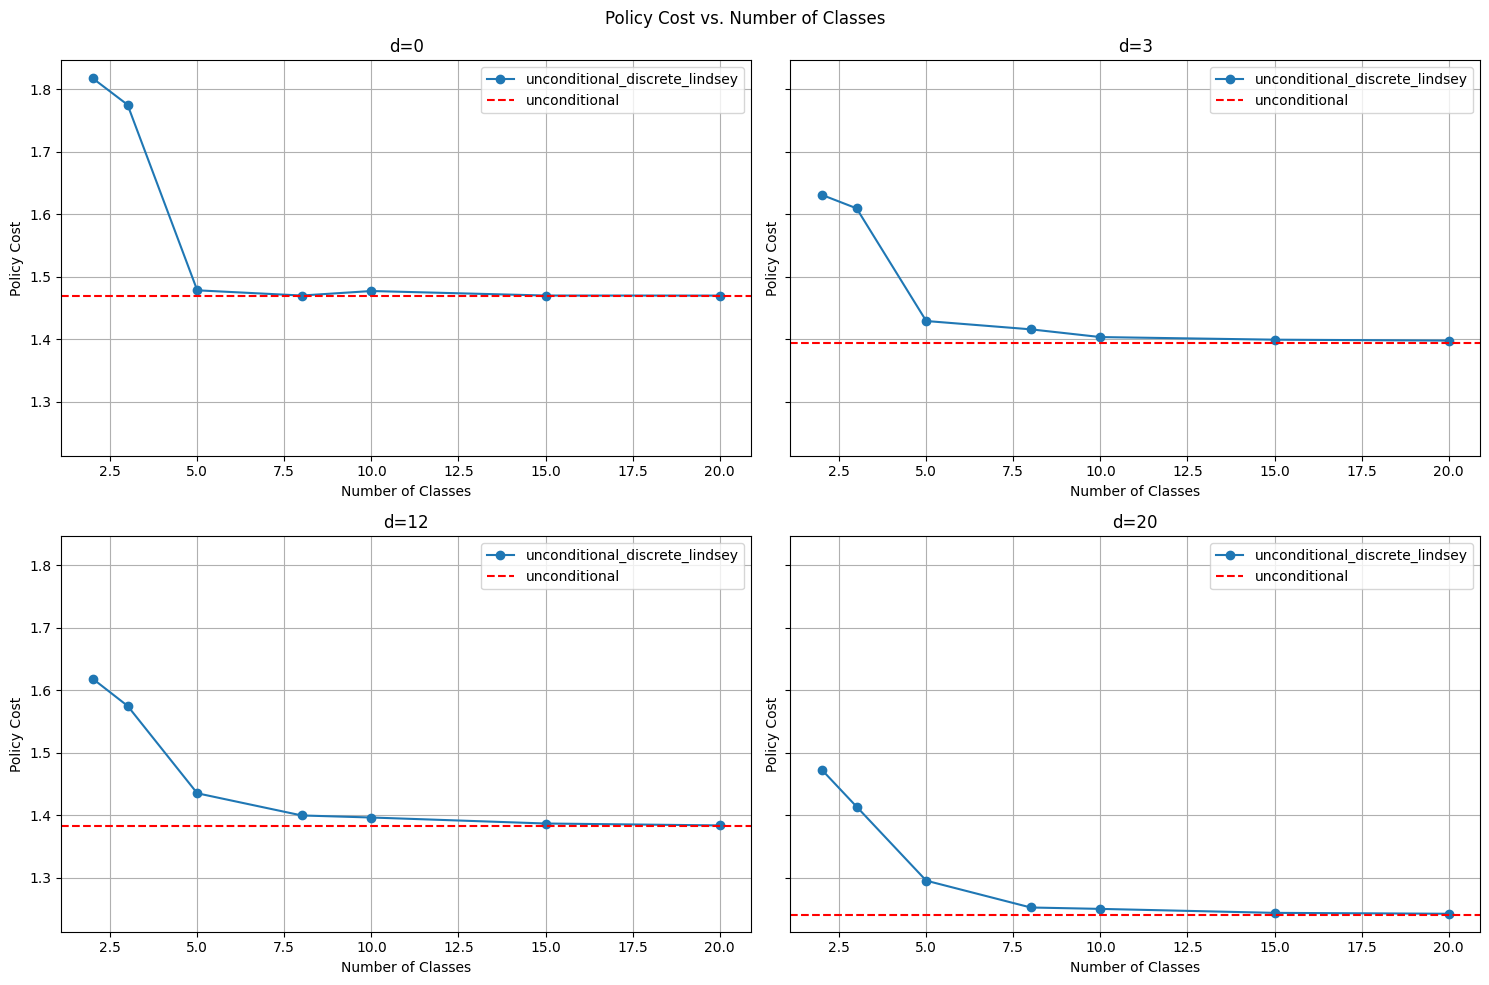

In [20]:
df = pd.read_csv("results/malawi.csv")
plot_policy_cost_vs_nclass(df)